In [1]:
# multiclass classification example
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[10]

3

In [7]:
# Preparing the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 74ms/step - loss: 2.5532 - accuracy: 0.5142 - val_loss: 1.7534 - val_accuracy: 0.6010
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.4806 - accuracy: 0.6820 - val_loss: 1.3406 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 1.1446 - accuracy: 0.7532 - val_loss: 1.1766 - val_accuracy: 0.7260
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.9404 - accuracy: 0.7954 - val_loss: 1.0651 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.7736 - accuracy: 0.8307 - val_loss: 0.9954 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6460 - accuracy: 0.8616 - val_loss: 0.9672 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5377 - accuracy: 0.8854 - val_loss: 0.9023 - val_accuracy: 0.8030
Epoch 8/20
16

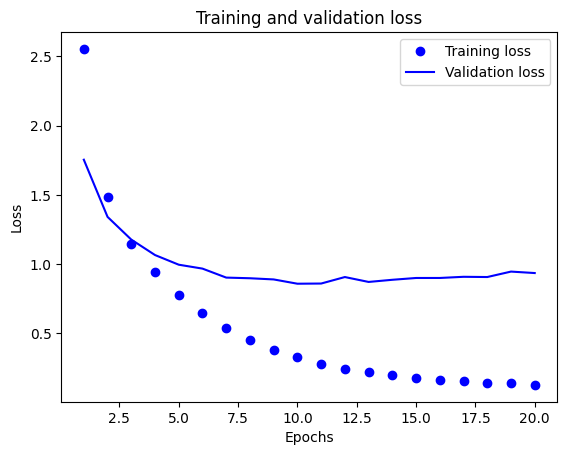

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

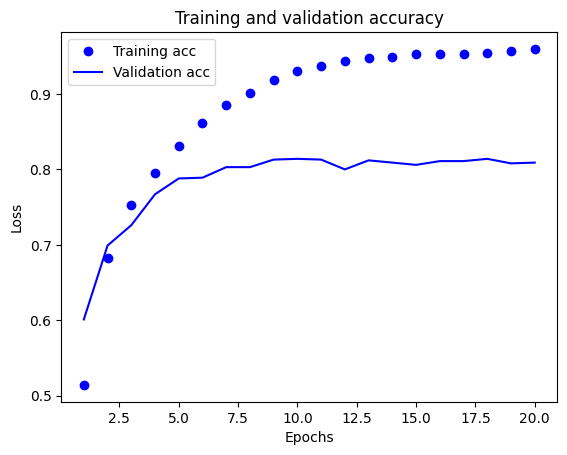

In [22]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 79ms/step - loss: 2.7629 - accuracy: 0.4754 - val_loss: 1.8109 - val_accuracy: 0.6140
Epoch 2/9
16/16 [==============================] - 1s 59ms/step - loss: 1.5372 - accuracy: 0.6780 - val_loss: 1.3761 - val_accuracy: 0.6850
Epoch 3/9
16/16 [==============================] - 1s 81ms/step - loss: 1.1816 - accuracy: 0.7408 - val_loss: 1.1860 - val_accuracy: 0.7340
Epoch 4/9
16/16 [==============================] - 2s 114ms/step - loss: 0.9789 - accuracy: 0.7815 - val_loss: 1.0870 - val_accuracy: 0.7500
Epoch 5/9
16/16 [==============================] - 2s 108ms/step - loss: 0.8169 - accuracy: 0.8201 - val_loss: 1.0127 - val_accuracy: 0.7670
Epoch 6/9
16/16 [==============================] - 2s 99ms/step - loss: 0.6860 - accuracy: 0.8490 - val_loss: 0.9495 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 2s 144ms/step - loss: 0.5758 - accuracy: 0.8768 - val_loss: 0.9187 - val_accuracy: 0.8010
Epoch 8/9
16/16 [

In [24]:
results

[0.9592143893241882, 0.7845057845115662]

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17542297417631345

In [26]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [27]:
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

0.99999994

In [29]:
np.argmax(predictions[0])

3

In [30]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [31]:
model.compile(optimizer='rmsprop',

loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 24ms/step - loss: 3.4911 - accuracy: 0.0798 - val_loss: 3.2296 - val_accuracy: 0.0970
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 2.8686 - accuracy: 0.1205 - val_loss: 2.6000 - val_accuracy: 0.1200
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 2.1124 - accuracy: 0.4097 - val_loss: 1.8596 - val_accuracy: 0.4600
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.5312 - accuracy: 0.6422 - val_loss: 1.5188 - val_accuracy: 0.6660
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2585 - accuracy: 0.7062 - val_loss: 1.3929 - val_accuracy: 0.7040
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1050 - accuracy: 0.7362 - val_loss: 1.3290 - val_accuracy: 0.7030
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9960 - accuracy: 0.7507 - val_loss: 1.2923 - val_accuracy: 0.7130
Epoch 8/20
63